In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
  
#https://www.kaggle.com/rakannimer/air-passengers
df=pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses20-38/House29-1m.csv')
  
#We need to set the Month column as index and convert it into datetime
df.set_index('timestamp',inplace=True)
df.index=pd.to_datetime(df.index)
df = df.resample('5T').mean()
df = df.loc['2019-03-31':'2019-10-28']
#df.drop(df.columns[[0,1,3,4,5]], axis = 1, inplace = True)
#df = df.iloc[2:]

df.head()

,BATTERY_KW,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,,
2019-03-31 00:00:00+02:00,0.074,0.0,0.48,0.0,0.48,3.614
2019-03-31 00:05:00+02:00,0.074,0.0,0.48,0.0,0.48,3.614
2019-03-31 00:10:00+02:00,0.074,0.0,0.48,0.0,0.48,3.614
2019-03-31 00:15:00+02:00,0.074,0.0,0.48,0.0,0.48,3.614
2019-03-31 00:20:00+02:00,0.074,0.0,0.48,0.0,0.48,3.614


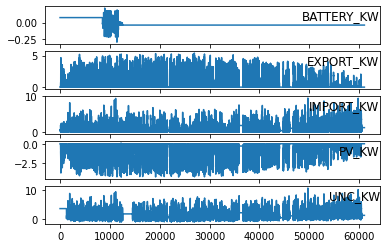

In [6]:
from matplotlib import pyplot
# load dataset
dataset = df
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [13]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.720507        0.0   0.050188   0.978667   0.577447   0.396148  0.720507   
2   0.720507        0.0   0.050188   0.978667   0.577447   0.396148  0.720507   
3   0.720507        0.0   0.050188   0.978667   0.577447   0.396148  0.720507   
4   0.720507        0.0   0.050188   0.978667   0.577447   0.396148  0.720507   
5   0.720507        0.0   0.050188   0.978667   0.577447   0.396148  0.720507   

   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  
1      0.0  0.050188  0.978667  0.577447  0.396148  
2      0.0  0.050188  0.978667  0.577447  0.396148  
3      0.0  0.050188  0.978667  0.577447  0.396148  
4      0.0  0.050188  0.978667  0.577447  0.396148  
5      0.0  0.050188  0.978667  0.577447  0.396148  


In [20]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 11) (8760,) (52295, 1, 11) (52295,)


Epoch 1/50
122/122 - 2s - loss: 0.1067 - val_loss: 0.0506 - 2s/epoch - 14ms/step
Epoch 2/50
122/122 - 0s - loss: 0.0864 - val_loss: 0.0390 - 481ms/epoch - 4ms/step
Epoch 3/50
122/122 - 0s - loss: 0.0747 - val_loss: 0.0317 - 498ms/epoch - 4ms/step
Epoch 4/50
122/122 - 0s - loss: 0.0621 - val_loss: 0.0286 - 483ms/epoch - 4ms/step
Epoch 5/50
122/122 - 0s - loss: 0.0546 - val_loss: 0.0275 - 486ms/epoch - 4ms/step
Epoch 6/50
122/122 - 0s - loss: 0.0507 - val_loss: 0.0279 - 483ms/epoch - 4ms/step
Epoch 7/50
122/122 - 0s - loss: 0.0464 - val_loss: 0.0258 - 479ms/epoch - 4ms/step
Epoch 8/50
122/122 - 0s - loss: 0.0442 - val_loss: 0.0224 - 480ms/epoch - 4ms/step
Epoch 9/50
122/122 - 0s - loss: 0.0391 - val_loss: 0.0261 - 479ms/epoch - 4ms/step
Epoch 10/50
122/122 - 1s - loss: 0.0386 - val_loss: 0.0277 - 502ms/epoch - 4ms/step
Epoch 11/50
122/122 - 0s - loss: 0.0360 - val_loss: 0.0212 - 489ms/epoch - 4ms/step
Epoch 12/50
122/122 - 0s - loss: 0.0318 - val_loss: 0.0210 - 489ms/epoch - 4ms/step
Epo

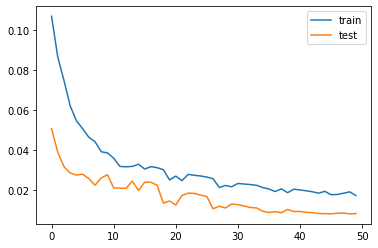

In [21]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [24]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: in user code:

    File "/home/alihan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/alihan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/alihan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/alihan/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/alihan/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/alihan/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 1, 11), found shape=(None, 11)
